## 📊Stock Market Analysis  + Prediction 📈

We  explore data from the stock market, particularly some technology stocks (Apple, Amazon, Google, and Microsoft). We will learn how to use yfinance to get stock information, and visualize different aspects of it using Seaborn and Matplotlib. And make some predictions

* will be answering the following questions along the way:
   
    1. what is the price stock change over time
    2. What is the daily return for the Stock, based on it Closing Price ?


#### Getting the Data
The first step is to get the data and load it to memory. We will get our stock data from the Yahoo Finance website.

In [1]:
!pip install yfinance

In [20]:
import pandas as pd
import numpy as np

from scipy.stats import norm

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

import yfinance as yf
from datetime import datetime

tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
end = datetime.now()
start = datetime(end.year - 3, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    
company_list = [AAPL, GOOG, MSFT, AMZN]
##company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, tech_list):
    company['Ticker'] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Ticker
Date,,,,,,,
2024-09-24,194.270004,195.369995,190.130005,193.960007,193.960007,43478900,AMZN
2024-09-25,193.750000,193.949997,192.160004,192.529999,192.529999,26391100,AMZN
2024-09-26,194.309998,194.529999,189.539993,191.160004,191.160004,36334900,AMZN
2024-09-27,190.679993,190.899994,187.339996,187.970001,187.970001,36002300,AMZN
2024-09-30,187.139999,188.490005,184.649994,186.330002,186.330002,41583900,AMZN
2024-10-01,184.899994,186.190002,183.449997,185.130005,185.130005,36044900,AMZN
2024-10-02,184.440002,186.600006,184.039993,184.759995,184.759995,23704100,AMZN
2024-10-03,183.050003,183.440002,180.880005,181.960007,181.960007,30204300,AMZN
2024-10-04,185.750000,187.600006,183.600006,186.509995,186.509995,40890300,AMZN


####   General Exploratory Analysis

In [21]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,3.016000e+03
mean,192.759728,194.859905,190.642180,192.806932,191.519479,4.596567e+07
std,88.347692,88.871556,87.621709,88.294378,87.336411,2.987649e+07
min,82.800003,83.480003,81.430000,81.820000,81.820000,3.258069e+06
25%,134.054996,135.647621,132.765003,134.166000,133.752960,2.317058e+07
50%,165.848503,167.720001,164.413506,165.794998,164.959343,3.874690e+07
75%,228.662495,231.255005,225.817497,228.064999,227.211720,5.999932e+07
max,467.000000,468.350006,464.459991,467.559998,466.718781,3.186799e+08


The .describe() method gives us summary statistics for numerical columns in our DataFrame. It shows us the average value, median values standard deviation, minimum, and maximum values of each numerical columns.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3016 entries, 2021-10-07 to 2024-10-07
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3016 non-null   float64
 1   High       3016 non-null   float64
 2   Low        3016 non-null   float64
 3   Close      3016 non-null   float64
 4   Adj Close  3016 non-null   float64
 5   Volume     3016 non-null   int64  
 6   Ticker     3016 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 188.5+ KB


#### Closing price

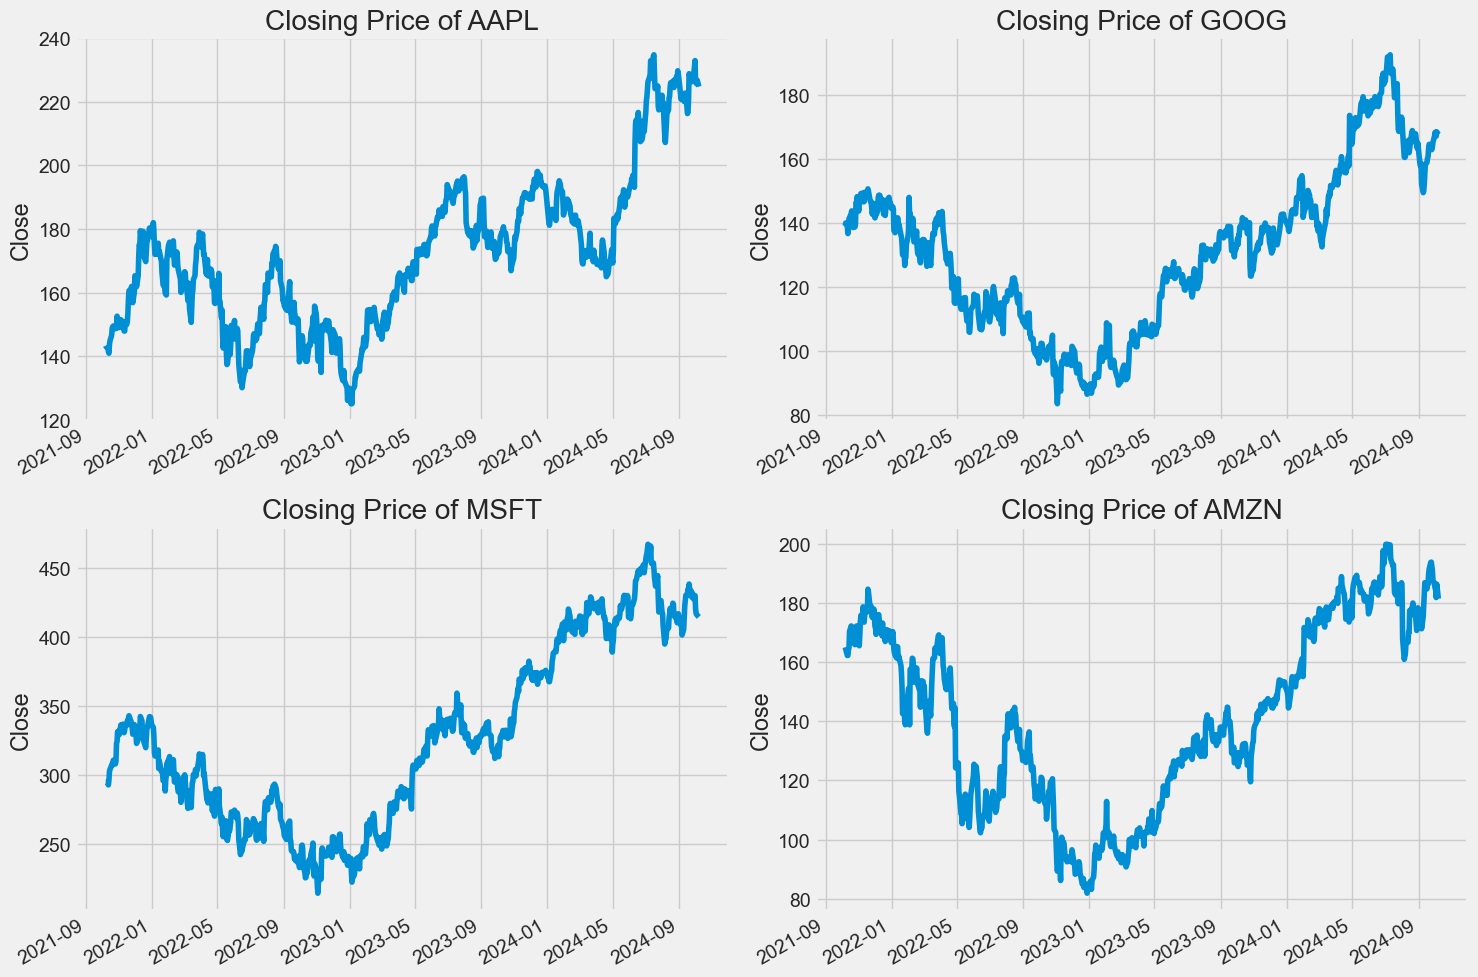

In [23]:
plt.figure(figsize = (15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i , company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Close'].plot()
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(f'Closing Price of {tech_list[i - 1]}')
plt.tight_layout()

Each line in the charts shows how the closing price of the stock fluctuates from day to day over the selected time period.

## 1. What is the change of price of the stock over time

**Price Difference**

price difference is the diff between ´Close´  and the previous day's ´Close´

*Positive difference* (Close Day 2 > Close Day 1): If the closing price on Day 2 is higher than on Day 1, it means the stock gained value during that trading day. This is often referred to as an upward movement or positive price change.

*Negative difference* (Close Day 2 < Close Day 1): If the closing price on Day 2 is lower than on Day 1, the stock lost value. This is referred to as a downward movement or negative price change

> A large price difference (whether positive or negative) indicates that the stock was volatile on that day, experiencing significant movement. This could be due to major news, earnings reports, or changes in investor sentiment.

> A small price difference suggests that the stock was relatively stable, with little change in price. This might indicate a lack of new developments or relatively quiet market conditions.

In [24]:
df['PriceDiff'] = df['Close'].shift(-1) - df['Close']
#df['Return'] = df['PriceDiff']/df['Close']
df['Direction'] = df['PriceDiff'].apply(lambda x: 1 if x > 0 else 0)
df.dropna(inplace=True)


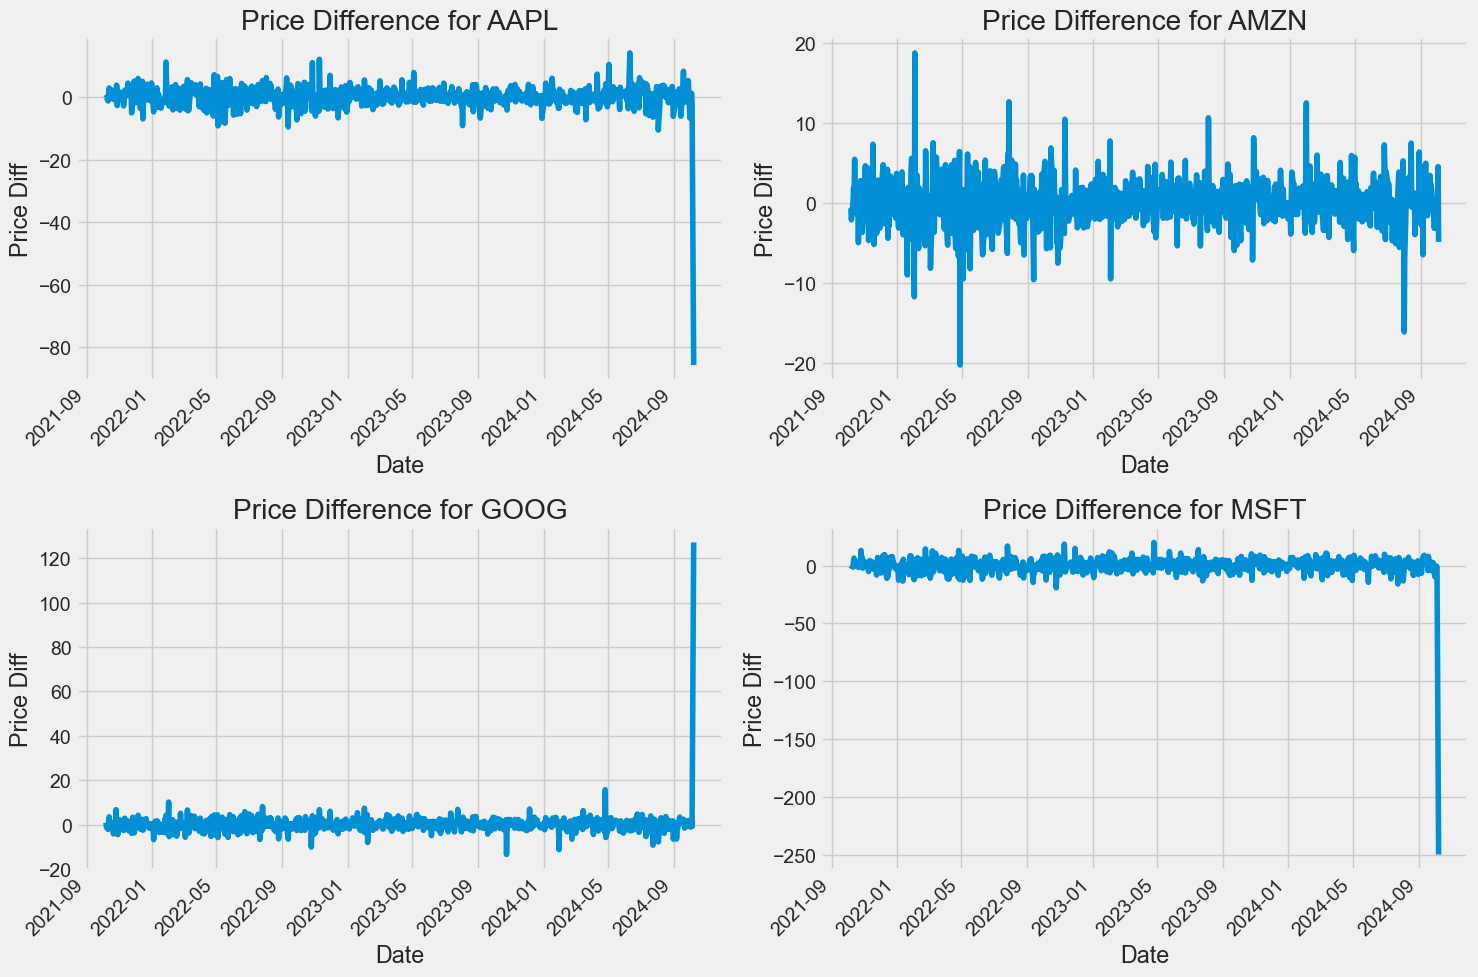

In [25]:
grouped = df.groupby('Ticker')

# Set up the plotting area
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

# Plot PriceDiff for each Ticker
for i, (ticker, data) in enumerate(grouped, 1):
    plt.subplot(2, 2, i)  # Create subplots (2x2 for 4 stocks)
    data['PriceDiff'].plot()
    plt.ylabel('Price Diff')
    plt.xlabel('Date')
    plt.title(f"Price Difference for {ticker}")
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()


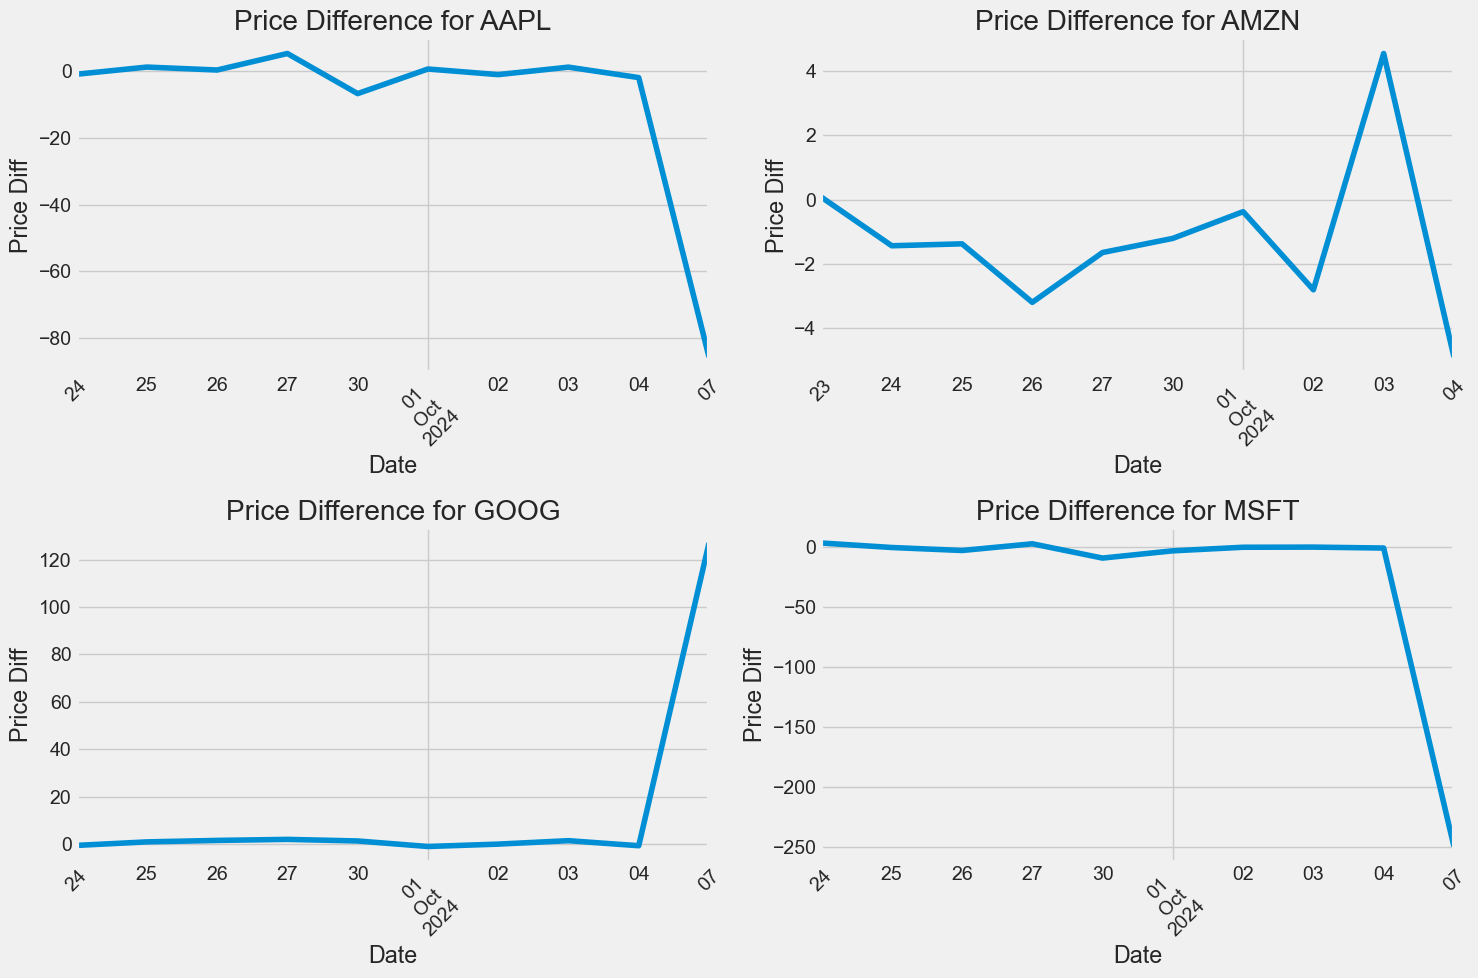

In [26]:
# lets focus on  the sharp chages in t2024

df_2024 = df[(df.index.year == 2024)].groupby('Ticker').tail(10) # & (df.index.month == 10)]
grouped_2024 = df_2024.groupby('Ticker')

# Set up the plotting area
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

# Plot PriceDiff for each Ticker
for i, (ticker, data) in enumerate(grouped_2024, 1):
    plt.subplot(2, 2, i)  # Create subplots (2x2 for 4 stocks)
    data['PriceDiff'].plot()
    plt.ylabel('Price Diff')
    plt.xlabel('Date')
    plt.title(f"Price Difference for {ticker}")
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

We experienced in the Notable Change in the Price difference in early October. this is due to the fact thet the PriceDiff for the last day cannot be calculated. we can remove the last date for the ´PriceDiff´ visualization

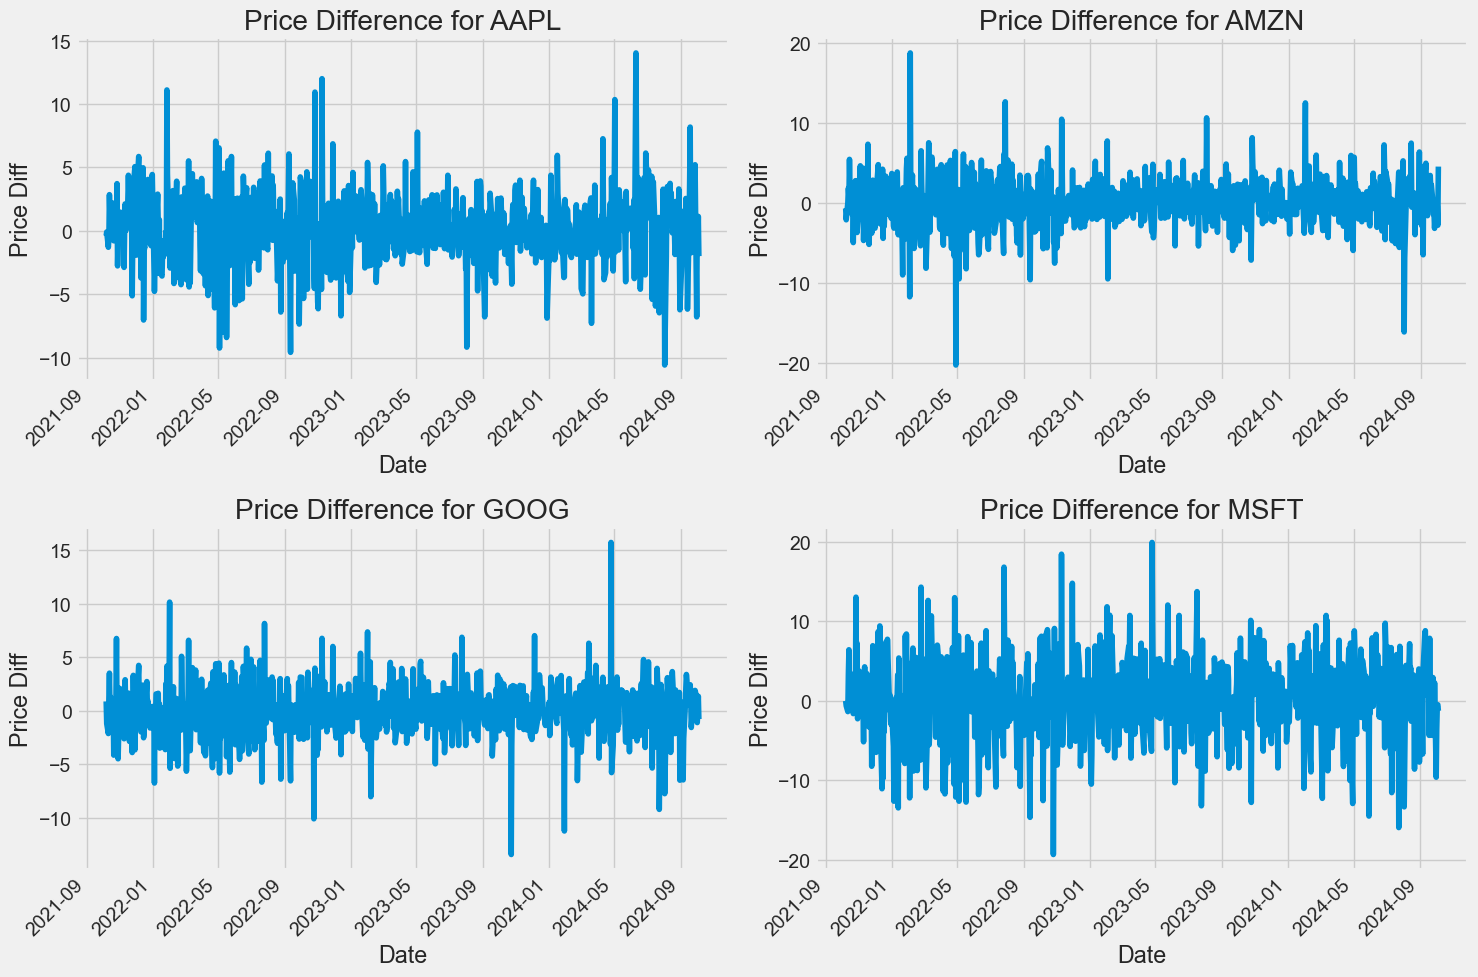

In [27]:
grouped = df.groupby('Ticker')

# Set up the plotting area
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

# Plot PriceDiff for each Ticker
for i, (ticker, data) in enumerate(grouped, 1):
    data = data[:-1]
    plt.subplot(2, 2, i)  # Create subplots (2x2 for 4 stocks)
    data['PriceDiff'].plot()
    plt.ylabel('Price Diff')
    plt.xlabel('Date')
    plt.title(f"Price Difference for {ticker}")
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

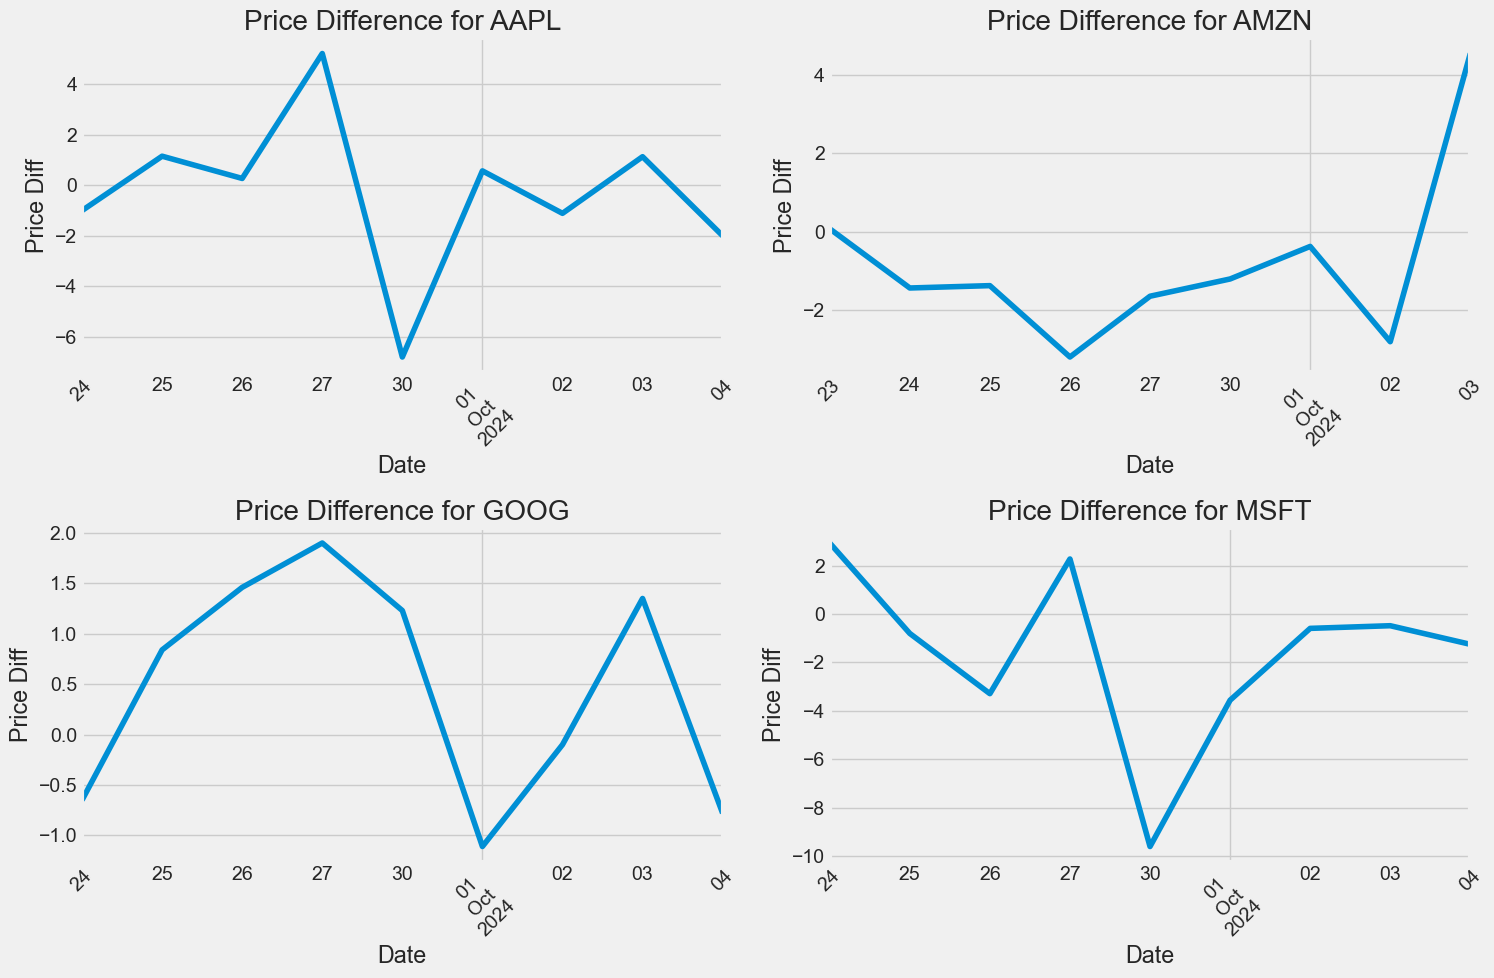

In [28]:
df_2024 = df[(df.index.year == 2024)].groupby('Ticker').tail(10) # & (df.index.month == 10)]
grouped_2024 = df_2024.groupby('Ticker')

# Set up the plotting area
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

# Plot PriceDiff for each Ticker
for i, (ticker, data) in enumerate(grouped_2024, 1):
    data = data[:-1]
    plt.subplot(2, 2, i)  # Create subplots (2x2 for 4 stocks)
    data['PriceDiff'].plot()
    plt.ylabel('Price Diff')
    plt.xlabel('Date')
    plt.title(f"Price Difference for {ticker}")
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

## 2. What is the daily return for the Stock, based on it Closing Price ?

To calculate the daily return we use log instead of normal return because normal return are not additive and does not often follow normal distribution. 

For instance
    
    If a stock increases by 10% on one day and decreases by 10% the next day, the overall return is not zero but slightly negative. This non-linearity makes normal returns harder to aggregate over multiple periods.

    Also Many statistical techniques, such as linear regression, t-tests, ANOVA, and others, assume normal distribution of the data (or residuals). If the data or residuals follow a normal distribution, it simplifies these calculations and improves the accuracy of the results.

In [29]:
df['LogReturn'] = np.log(df['Close']).shift(-1) - np.log(df['Close'])

Average log return for AAPL is -3.8544984313239297e-05
standard dev log return for AAPL is 0.02459691235038887
Average log return for GOOG is 0.0009955692167714768
standard dev log return for GOOG is 0.028910199602825835
Average log return for MSFT is -0.0007689458512555746
standard dev log return for MSFT is 0.03779393434782724
Average log return for AMZN is 0.00015270588261136626
standard dev log return for AMZN is 0.024013949119405235


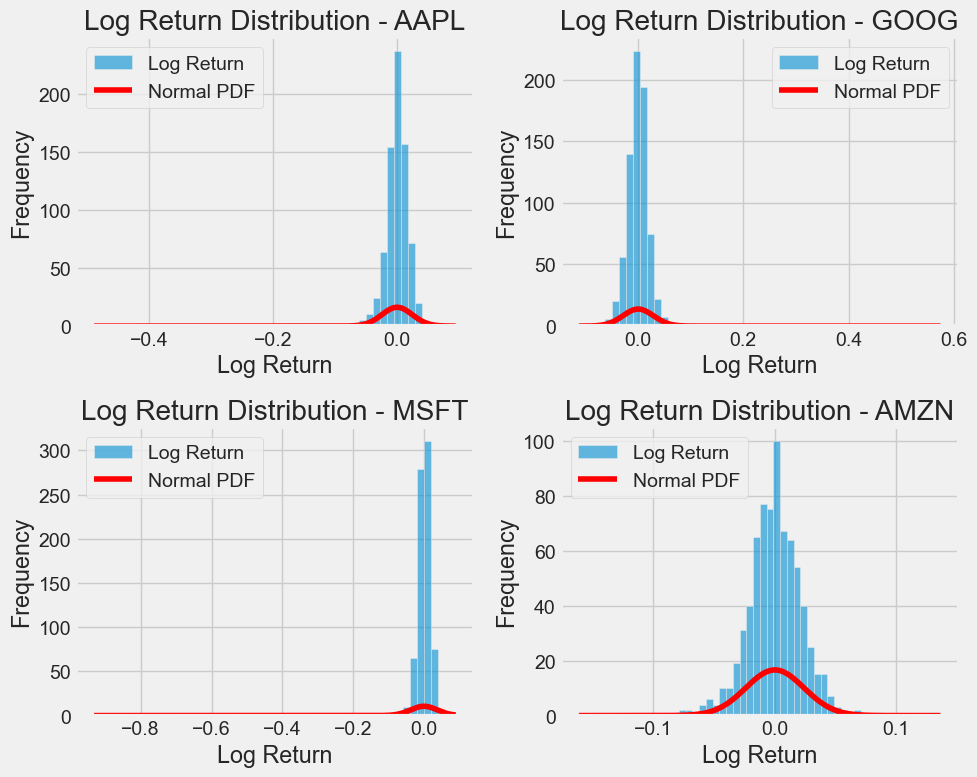

In [30]:

# Set up the figure size
plt.figure(figsize=(20, 15))

# Get the unique tickers in your DataFrame
tickers = df['Ticker'].unique()

# Loop through each stock (ticker)
for i, ticker in enumerate(tickers, 1):
    
    df = df[:-1]
    # Filter the data for the current ticker
    stock_data = df[df['Ticker'] == ticker]
    
    # Calculate mean and standard deviation of LogReturn for the current stock
    mu = stock_data['LogReturn'].mean()
    sigma = stock_data['LogReturn'].std(ddof=1)
    
    print(f'Average log return for {ticker} is {mu}')
    print(f'standard dev log return for {ticker} is {sigma}')
    
    # Create a density DataFrame for plotting the normal distribution
    density = pd.DataFrame()
    density['x'] = np.arange(stock_data['LogReturn'].min()-0.01, stock_data['LogReturn'].max()+0.01, 0.001)
    density['pdf'] = norm.pdf(density['x'], mu, sigma)
    
    # Create a subplot for each stock
    plt.subplot(2, 2, i)  # Adjust the grid size if needed for more stocks
    
    # Plot the histogram for LogReturn
    stock_data['LogReturn'].hist(bins=50, alpha=0.6, label='Log Return', figsize=(10, 8))
    
    # Plot the PDF of the normal distribution (red line)
    plt.plot(density['x'], density['pdf'], color='red', label=f'Normal PDF')
    
    # Add titles and labels
    plt.title(f'Log Return Distribution - {ticker}')
    plt.xlabel('Log Return')
    plt.ylabel('Frequency')
    
    # Add a legend
    plt.legend()

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()



    0.02% average daily growth: While this may seem small, returns compound over time. This small positive daily return can add up significantly over months or years.
    
    2.41% daily volatility: The daily price of AMZN tends to fluctuate by around 2.41%. This means that while the stock generally increases in value (small average log return), it can also experience notable short-term price swings, reflecting market uncertainty or reactions to events.
    

 ## 3. What is the average Stocks Return with 90% Confidence Interval ?

In [31]:
for i, ticker in enumerate(tickers, 1):
    stock_data = df[df['Ticker'] == ticker]
    
    sample_size = len(stock_data)
    sample_mean = stock_data['LogReturn'].mean()
    sample_std = stock_data['LogReturn'].std(ddof=1) / sample_size**0.5
    alpha = 0.1
    
    z_left = norm.ppf((1 - alpha)/2)
    z_right = norm.ppf(alpha/2)

    # upper and lower bound
    interval_left = sample_mean+z_left*sample_std
    interval_right = sample_mean + z_right *sample_std
    print(f'90% confidence interval for {ticker} is ({interval_left}, {interval_right})')
        

90% confidence interval for AAPL is (-0.00015110823612905812, -0.001511950113610765)
90% confidence interval for GOOG is (0.0008632669980384405, -0.0007362106008341844)
90% confidence interval for MSFT is (-0.0009419028504310319, -0.003032879467441438)
90% confidence interval for AMZN is (4.244425791135925e-05, -0.0012905719258824188)


The true mean log return for MSFT falls between -0.00307 and -0.00095. The average daily log return for MSFT is between-0.307% and 0.095%. This indicate slight decline in the performance of MSFT. *We are 90% confident that average performace fall within this range*

GOOG falls between negative and positive value. This kind of confidence interval is common when a stock is relatively stable or volatile without a clear trend during the period in question. It shows that further data might be needed to make a stronger case for either positive or negative returns.

## Hypothesis Testing

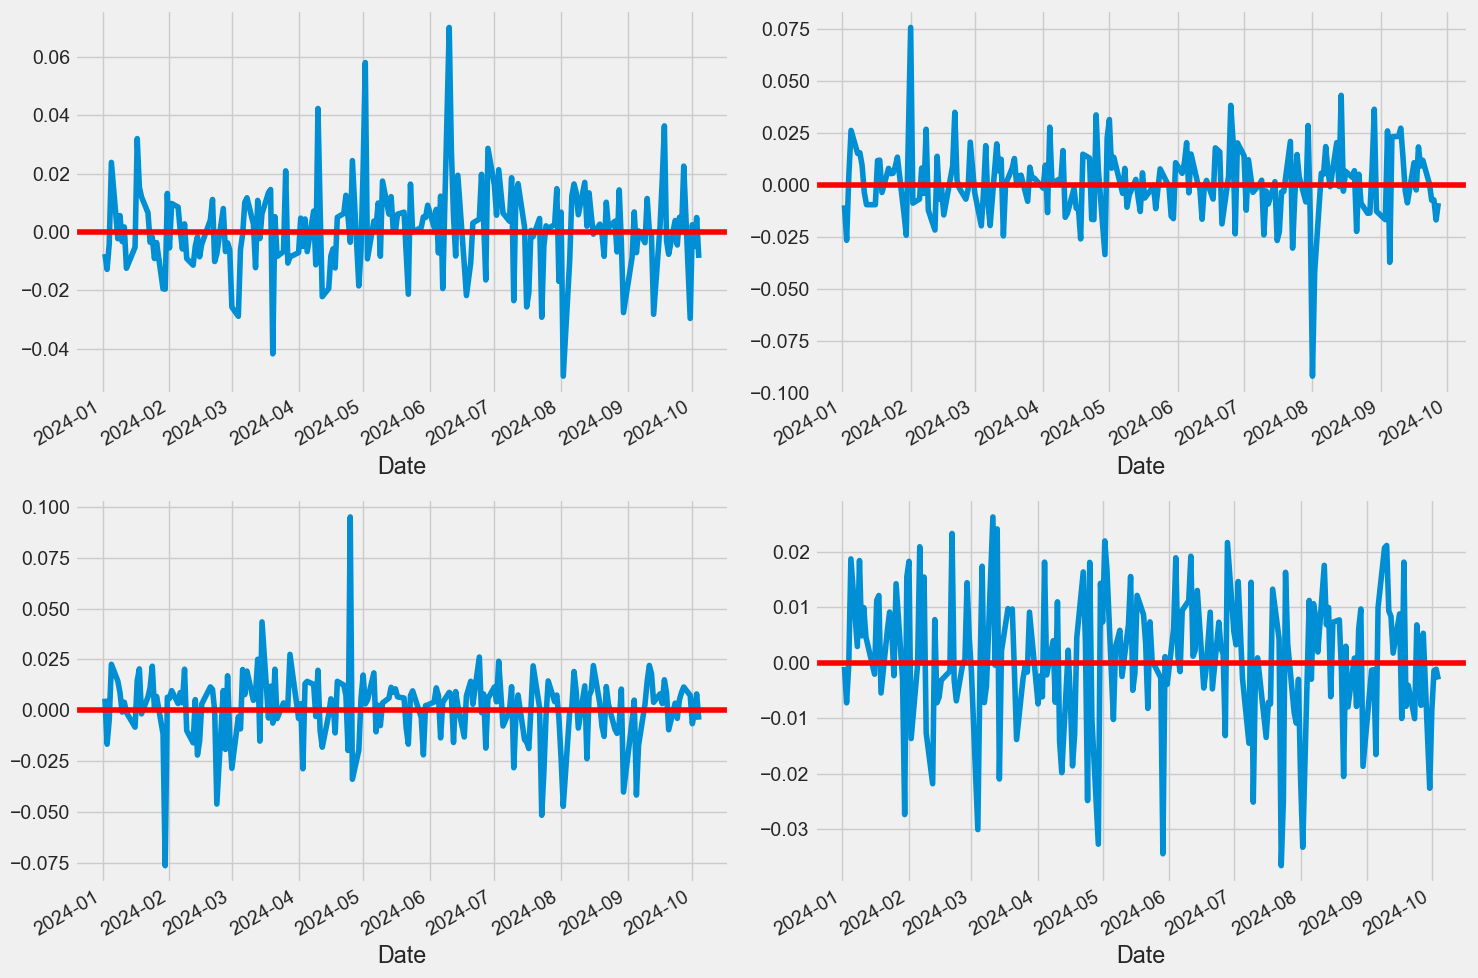

In [32]:
grouped = df.groupby('Ticker')

grouped_2024 = df[(df.index.year == 2024)].groupby('Ticker')

# Set up the plotting area
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

# Plot PriceDiff for each Ticker
for i, (ticker, data) in enumerate(grouped_2024, 1):
    data = data[:-1]
    plt.subplot(2, 2, i)  # Create subplots (2x2 for 4 stocks)
    data['LogReturn'].plot()
    plt.axhline(0, color='red')

plt.tight_layout()
plt.show()

Even though the closing price shows an upward trend, We can not be very certain that daily return is significantly above 0. we need to set up an hypothesis test

We have One tail test and tail test.One tail test is used when we have a specific directional hypothesis.We expect teh difference to go in a particular direction (either greater than or less than a certain value). We use a two-tailed test when you are interested in detecting any significant difference. One Tail test is more appropriate in this situation.


the Null hypothesis is what we hope to reject.
    
    H0: μ ≤ 0
    Ha: μ > 0
Since our alternative hypothesis is  μ > 0, you’re conducting a right-tailed test. You need to calculate the z-critical value for the right tail:

In [33]:
for i, (ticker, data) in enumerate(grouped, 1):

    stock_data = df[df['Ticker'] == ticker]
    sample_size = len(stock_data)
    sample_mean = stock_data['LogReturn'].mean()
    sample_std = stock_data['LogReturn'].std(ddof=1) 
    alpha = 0.1
    
    # If the sample is large enough, we cam use z-distribution instead of t-distribution
    zhat = (sample_mean-0)/(sample_std/np.sqrt(sample_size))
  
    zright = norm.ppf(1-alpha, 0, 1)
    
    print('For {} At significant level of {}, shall we reject: {}'.format(ticker, alpha, zhat > zright))
    
    
    # alternatively we can use the P-value
    #p = 1 - norm.cdf(zhat, 0, 1)
    #print('At significant level of {}, shall we reject: {}'.format(alpha, p < alpha))



For AAPL At significant level of 0.1, shall we reject: False
For AMZN At significant level of 0.1, shall we reject: False
For GOOG At significant level of 0.1, shall we reject: False
For MSFT At significant level of 0.1, shall we reject: False


In both cases, the data suggests that there is no significant evidence at the 10% significance level to claim that the mean returns of AAPL or AMZN are greater than zero. Therefore, We cannot conclude that these stocks have a positive mean return based on this analysis. *We fail to 

## 4.  is there any association or pattern between the stock price change of tomorrow and the number of full days in the last five days?

Both `covariance` and `correlation` measure the relationship and the dependency between two variables. Covariance indicates the direction of the linear relationship between variables. Correlation measures both the strength and direction of the linear relationship between two variables.

In [41]:

# Pivot the data
df_pivot = df.pivot(columns='Ticker', values='LogReturn')
df_pivot.dropna(inplace = True)

Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2021-10-07,-0.002725,-0.004191,0.006235,0.000000
2021-10-08,-0.000630,-0.012952,-0.008666,-0.002105
2021-10-11,-0.009145,0.000317,-0.015492,-0.004599
2021-10-12,-0.004249,0.011314,0.008645,0.011643
2021-10-13,0.020024,0.004733,0.025149,0.021501
...,...,...,...,...
2024-09-24,-0.004408,-0.007400,-0.003980,0.006827
2024-09-25,0.005067,-0.007141,0.005140,-0.001853
2024-09-26,0.001186,-0.016828,0.008872,-0.007657


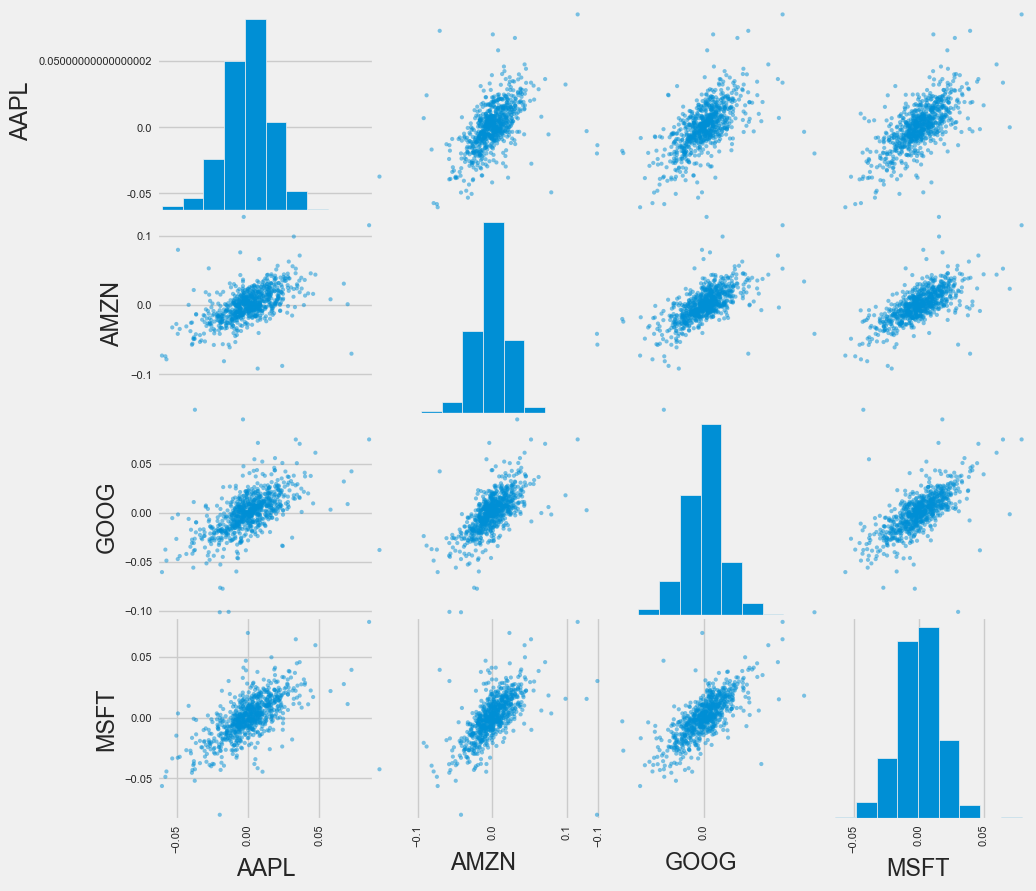

In [47]:
# scatter matrix plot
from pandas.plotting import scatter_matrix
sm = scatter_matrix(df_pivot, figsize=(10, 10))

Text(0.5, 1.0, 'Correlation of stock log return')

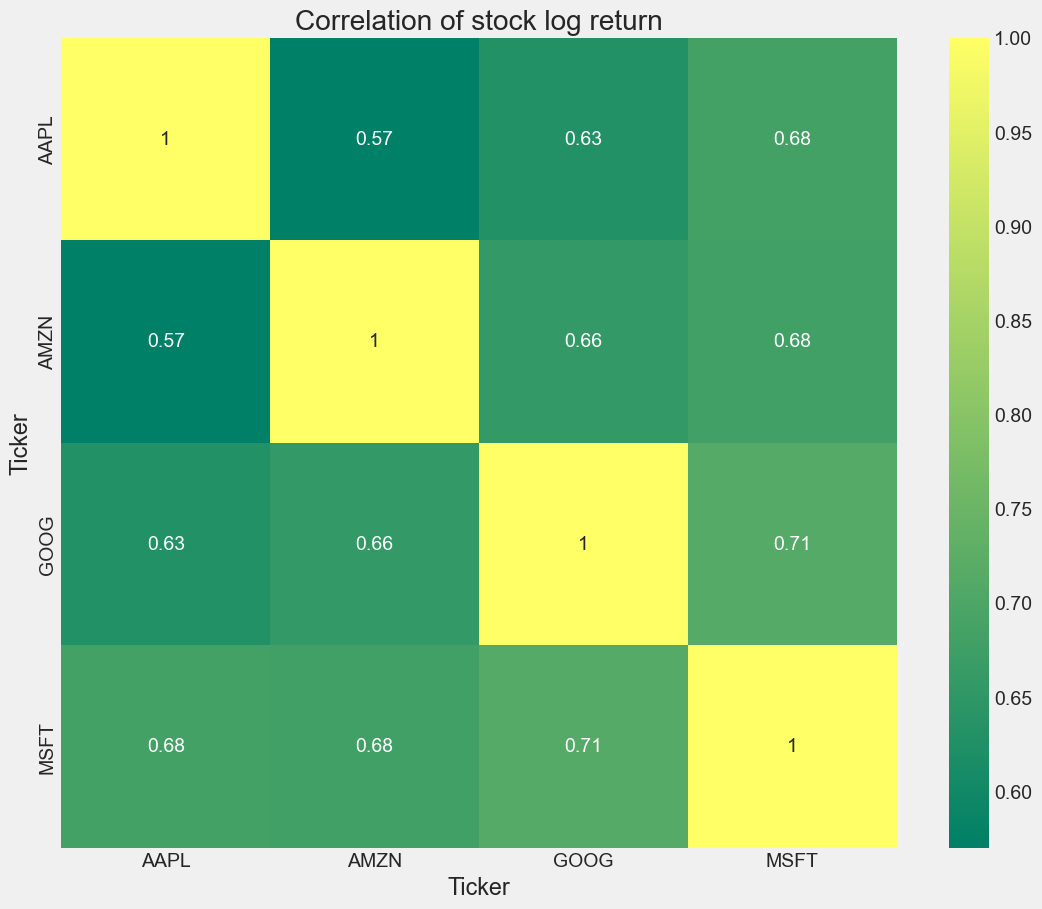

In [45]:
plt.figure(figsize=(12, 10))


sns.heatmap(df_pivot.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock log return')

Generally, there is a strong positive correlation between all the stock

## Stock Price Forecasting : Modelling and Forecast

    we forecast using Prophet. Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.
    

In [52]:
!pip install prophet

  Obtaining dependency information for prophet from https://files.pythonhosted.org/packages/12/ff/a04156f4ca3d18bd005c73f79e86e0684346fbc2aea856429c3e49f2828e/prophet-1.1.6-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for cmdstanpy>=1.0.4 from https://files.pythonhosted.org/packages/5d/12/6522f3de83ca690aa52f4b8c88a1e203abb1e2d75c31669dc004949143cd/cmdstanpy-1.2.4-py3-none-any.whl.metadata
  Obtaining dependency information for holidays<1,>=0.25 from https://files.pythonhosted.org/packages/0f/69/fa78950f99c0add5222f693d13b987b642aa778bca63fb9aaaca365be16c/holidays-0.58-py3-none-any.whl.metadata
  Obtaining dependency information for importlib-resources from https://files.pythonhosted.org/packages/e1/6a/4604f9ae2fa62ef47b9de2fa5ad599589d28c9fd1d335f32759813dfa91e/importlib_resources-6.4.5-py3-none-any.whl.metadata
  Obtaining dependency information for stanio<2.0.0,>=0.4.0 from https://files.pythonhosted.org/packages/56/87/37a80e4d5bd453c33262d8fb618b6840fd98d24ed0

ModuleNotFoundError: No module named 'fbprophet'

In [59]:
from statsmodels.tsa.stattools import adfuller
from prophet import Prophet

In [66]:
for i, (ticker, stock_data) in enumerate(grouped, 1):
    # Reset index to convert Date from index to a column
    stock_data_reset = stock_data.reset_index()
    
    # Select only the Date and LogReturn columns
    stck = stock_data_reset[['Date', 'Close']]
    
    # Check for stationarity using ADF test
    result = adfuller(stck['Close'].dropna())
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    if result[1] <= 0.05:
        print(f"The time series {ticker} is stationary.")
    else:
        print(f"The time series {ticker} is non-stationary.")
    print(f"********************************")


ADF Statistic: -1.1309282236036404
p-value: 0.7025818523157923
The time series AAPL is non-stationary.
********************************
ADF Statistic: -1.1423187747732666
p-value: 0.6979041553608643
The time series AMZN is non-stationary.
********************************
ADF Statistic: -1.046998371854415
p-value: 0.7357393230477426
The time series GOOG is non-stationary.
********************************
ADF Statistic: -0.614364186567364
p-value: 0.8677031640872512
The time series MSFT is non-stationary.
********************************


A stationary time series has constant mean and variance over time, which means that statistical properties are consistent throughout the dataset. This consistency is crucial for many statistical modeling techniques.
    
    Prophet works well on non-stationary data because it models underlying trends and seasonality. The model assumes the data has an overall growth trend (which is often true for stock prices) and captures that with its built-in components.


21:36:02 - cmdstanpy - INFO - Chain [1] start processing
21:36:02 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE) for AAPL: 33.35
Mean Squared Error (MSE) for AAPL: 1566.10
Root Mean Squared Error (RMSE) for AAPL: 39.57


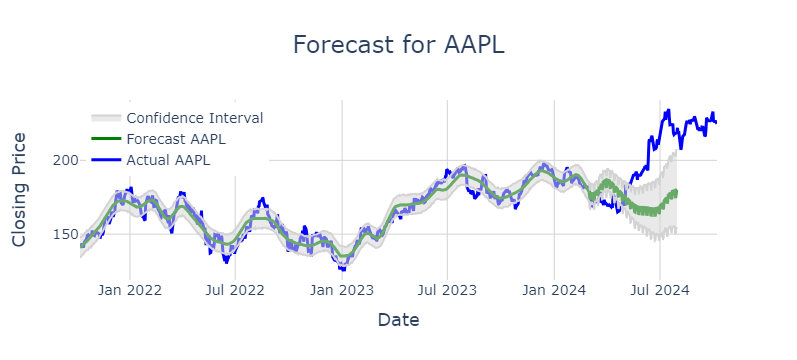

21:36:04 - cmdstanpy - INFO - Chain [1] start processing
21:36:05 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE) for AMZN: 12.95
Mean Squared Error (MSE) for AMZN: 278.04
Root Mean Squared Error (RMSE) for AMZN: 16.67


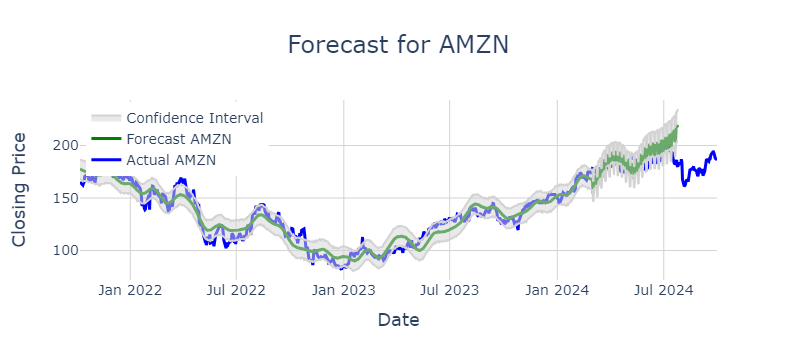

21:36:06 - cmdstanpy - INFO - Chain [1] start processing
21:36:06 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE) for GOOG: 12.09
Mean Squared Error (MSE) for GOOG: 260.04
Root Mean Squared Error (RMSE) for GOOG: 16.13


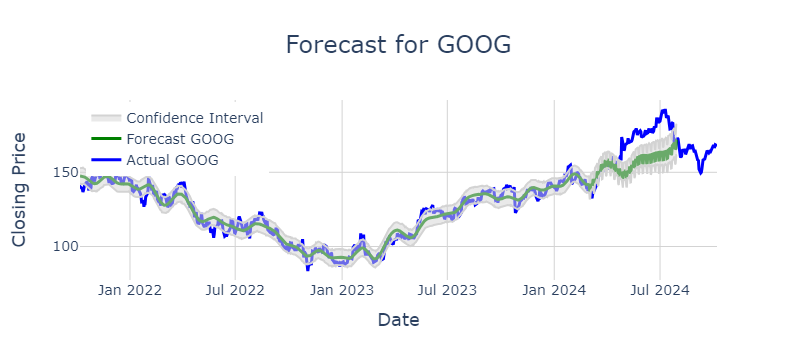

21:36:07 - cmdstanpy - INFO - Chain [1] start processing
21:36:08 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE) for MSFT: 57.88
Mean Squared Error (MSE) for MSFT: 4540.01
Root Mean Squared Error (RMSE) for MSFT: 67.38


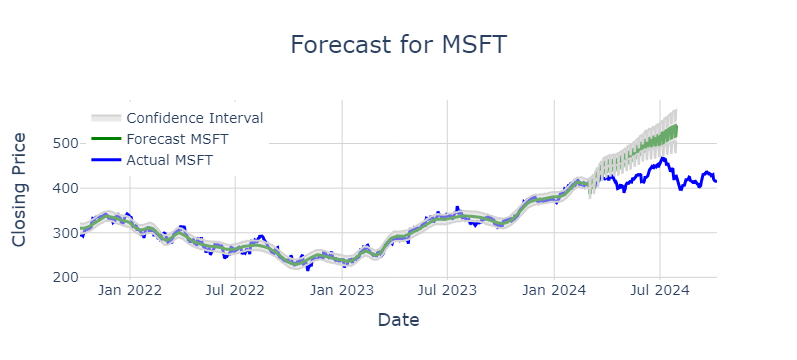

In [87]:
import pandas as pd
from prophet import Prophet
import plotly.graph_objects as go
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Assuming 'grouped' is your data grouped by stock tickers

for i, (ticker, stock_data) in enumerate(grouped, 1):
    # Reset index to convert Date from index to a column
    stock_data_reset = stock_data.reset_index()

    # Select only the Date and Close columns and make a copy
    stck = stock_data_reset[['Date', 'Close']].copy()

    # Rename columns for Prophet compatibility
    stck.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
    
    # Split the data into training and testing sets
    train_size = int(len(stck) * 0.8)  # 80% for training, 20% for testing
    train = stck[:train_size]
    test = stck[train_size:]

    # Fit the Prophet model
    model = Prophet()
    model.fit(train)

    # Create a DataFrame for future dates
    future = model.make_future_dataframe(periods=len(test))  # Forecasting for the test period
    forecast = model.predict(future)
    
    # Extract predictions for the test set
    forecast_test = forecast[['ds', 'yhat']].iloc[train_size:].set_index('ds')
    test = test.set_index('ds')

    # Calculate performance metrics
    mae = mean_absolute_error(test['y'], forecast_test['yhat'])
    mse = mean_squared_error(test['y'], forecast_test['yhat'])
    rmse = np.sqrt(mse)

    print(f"Mean Absolute Error (MAE) for {ticker}: {mae:.2f}")
    print(f"Mean Squared Error (MSE) for {ticker}: {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE) for {ticker}: {rmse:.2f}")

    # Create Plotly figure
    fig = go.Figure()

    # Add actual stock prices
    fig.add_trace(go.Scatter(
        x=stck['ds'], y=stck['y'],
        mode='lines', name=f'Actual {ticker}',
        line=dict(color='blue', width=3),
        hovertemplate='%{y:.2f}'
    ))

    # Add forecasted prices
    fig.add_trace(go.Scatter(
        x=forecast['ds'], y=forecast['yhat'],
        mode='lines', name=f'Forecast {ticker}',
        line=dict(color='green', width=3),
        hovertemplate='%{y:.2f}'
    ))

    # Add uncertainty intervals
    fig.add_trace(go.Scatter(
        x=forecast['ds'], y=forecast['yhat_lower'],
        fill=None, mode='lines', line_color='lightgrey', showlegend=False
    ))

    fig.add_trace(go.Scatter(
        x=forecast['ds'], y=forecast['yhat_upper'],
        fill='tonexty', mode='lines', line_color='lightgrey', name='Confidence Interval'
    ))

    # Update layout for visibility
    fig.update_layout(
        title={
            'text': f"Forecast for {ticker}",
            'y': 0.9,
            'x': 0.5,
            'xanchor': 'center',
            'yanchor': 'top',
            'font': {'size': 24}
        },
        xaxis_title="Date",
        yaxis_title="Closing Price",
        xaxis=dict(showgrid=True, gridwidth=1, gridcolor='LightGrey', title_font={'size': 18}),
        yaxis=dict(showgrid=True, gridwidth=1, gridcolor='LightGrey', title_font={'size': 18}),
        hovermode="x unified",
        font=dict(size=14),
        plot_bgcolor='white'
    )

    # Customize legend for better visibility
    fig.update_layout(
        legend=dict(
            yanchor="top",
            y=0.99,
            xanchor="left",
            x=0.01,
            font=dict(size=14)
        )
    )

    fig.show()